# Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
J_DAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
CITIES = ['מודיעין מכבים רעות', 'באר שבע', 'נתניה']
MODIIN,BS,NETANIA = CITIES

In [2]:
#full_df = pd.read_pickle('full.pkl')
full_hour_df = pd.read_pickle('hour.pkl')
full_day_df = pd.read_pickle('day.pkl')
id_df = pd.read_pickle('id.pkl')

In [3]:
full_hour_df.head(1)

total         id  count_reg                city  month  day  weekday  \
0  199.341003  702552276         11  מודיעין מכבים רעות      1    1        5   

  weekday_name  day_of_year  week  year  hour  consumption         ts  \
0     Saturday            1    52  2022     0        5.037 2022-01-01   

   temperature  r_humidity  heat_index  
0    10.716666        79.5   10.716667

In [4]:
full_day_df.head(1)

id  count_reg                city  month  day  weekday weekday_name  \
0  702552276         11  מודיעין מכבים רעות      1    1        5     Saturday   

   day_of_year  week  year       total  temperature  r_humidity  heat_index  \
0            1    52  2022  199.341003     9.863194   84.395836    9.863194   

          ts  
0 2022-01-01

In [5]:
id_df.head(1)

count_reg  no.                city  city_code_HHI  city_code_LAMAS  \
id                                                                              
702552276         11   32  מודיעין מכבים רעות           1932             1200   

          street                      address        lat        lng  
id                                                                   
702552276  חרצית  חרצית 32 מודיעין מכבים רעות  31.905869  35.010933

In [6]:
daily_usage = full_day_df[full_day_df.year == 2022][['id', 'total']].groupby('id').mean().reset_index()
bad_buildings = set(full_day_df[(np.log10(full_day_df.total + 1) > 4.5) | (full_day_df.count_reg > 30)].id.unique())
bad_buildings = bad_buildings.union(set(daily_usage[(daily_usage.total < 50) | (daily_usage.total > 800)].id.values))

day_df = pd.DataFrame(full_day_df[(full_day_df.id.map(lambda x: x not in bad_buildings)) & (full_day_df.year == 2022)])
hour_df = pd.DataFrame(full_hour_df[(full_hour_df.id.map(lambda x: x not in bad_buildings)) & (full_hour_df.year == 2022)])

In [7]:
id_df[['city']].value_counts()

city              
מודיעין מכבים רעות    2601
נתניה                 1200
באר שבע               1076
dtype: int64

In [8]:
day_df[['id', 'city']].groupby(['id', 'city']).count().reset_index()[['city']].value_counts()

city              
מודיעין מכבים רעות    2424
נתניה                  401
באר שבע                333
dtype: int64

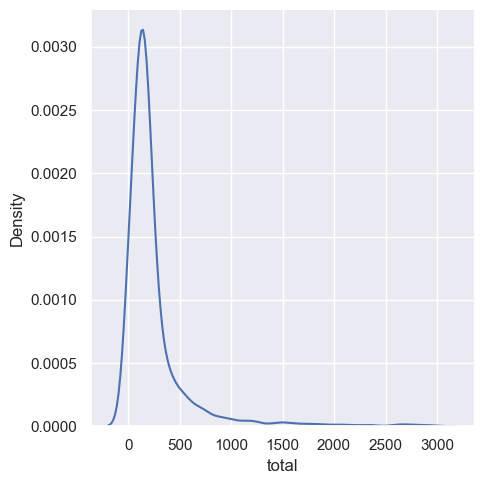

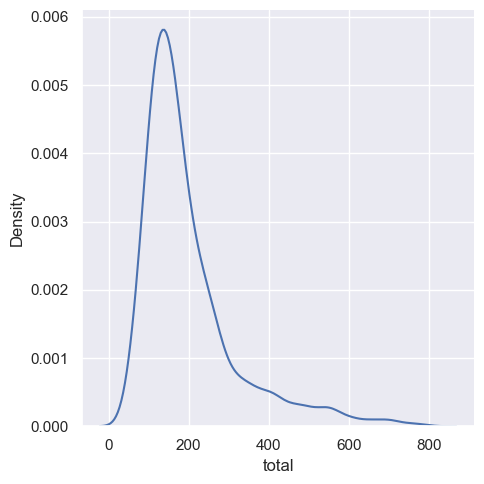

In [9]:

sns.displot(daily_usage[(daily_usage.total < 3000)].total, kind='kde')
sns.displot(daily_usage[daily_usage.id.map(lambda x: x not in bad_buildings)].total, kind='kde')

# Basic viz

In [25]:
sns.displot(full_day_df.log10_daily_consumption, kde=True)
sns.displot(data=full_day_df[(np.log10(full_day_df.total + 1) < 4.5)], x='log10_daily_consumption', kde=True)

AttributeError: 'DataFrame' object has no attribute 'log10_daily_consumption'

<Axes: xlabel='month', ylabel='total'>

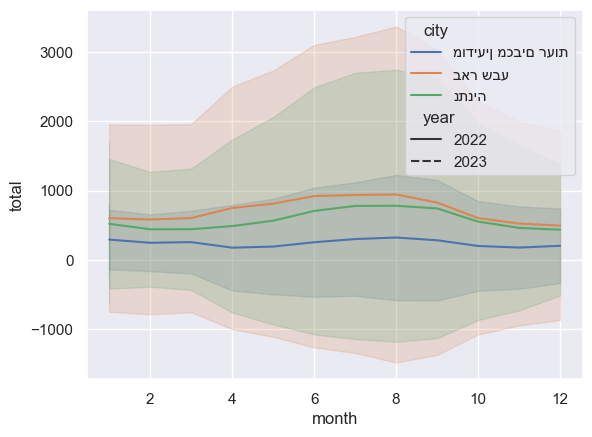

In [10]:
sns.lineplot(data=full_day_df[full_day_df.overconsuming == False], x='month', y='total', hue='city', style='year', errorbar='sd')
#day_df

In [42]:
def radar_plt(stats, ax, title, labels=None):
    if labels is None:
        labels = np.arange(1, len(stats)+1)
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)[::-1] # Set the angle
    stats=np.concatenate((stats,[stats[0]]))  # Closed
    angles=np.concatenate((angles,[angles[0]]))  # Closed
    ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
    ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, labels[:1])))  # Set the label for each axis
    ax.set_title(title)  # Set the pokemon's name as the title
    #ax.set_rlim(0,250)
    ax.grid(True)

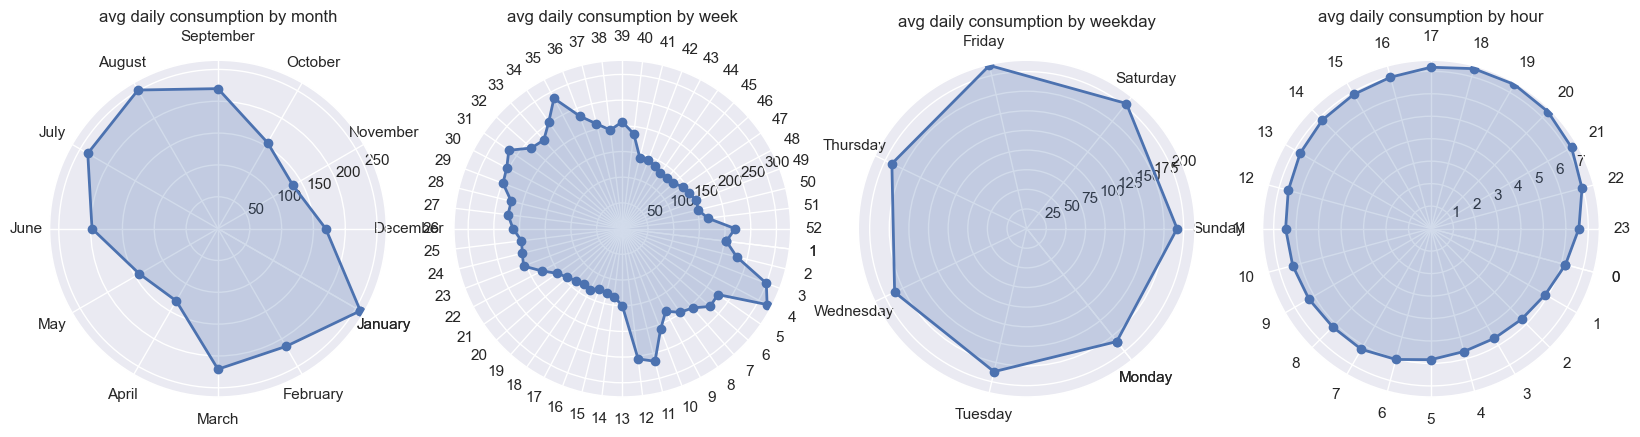

In [43]:
fig, axs = plt.subplots(figsize=(20, 5), nrows=1, ncols=4,
                            subplot_kw=dict(projection='polar'))
stats=day_df.groupby('month').mean(numeric_only=True).total.values
radar_plt(stats, axs[0], 'avg daily consumption by month', MONTHS)
stats=day_df.groupby('week').mean(numeric_only=True).total.values
radar_plt(stats, axs[1], 'avg daily consumption by week')
stats=day_df.groupby('weekday').mean(numeric_only=True).total.values
radar_plt(stats, axs[2], 'avg daily consumption by weekday', DAYS)
stats=hour_df.groupby('hour').mean(numeric_only=True).consumption.values
radar_plt(stats, axs[3], 'avg daily consumption by hour', np.arange(0,24))

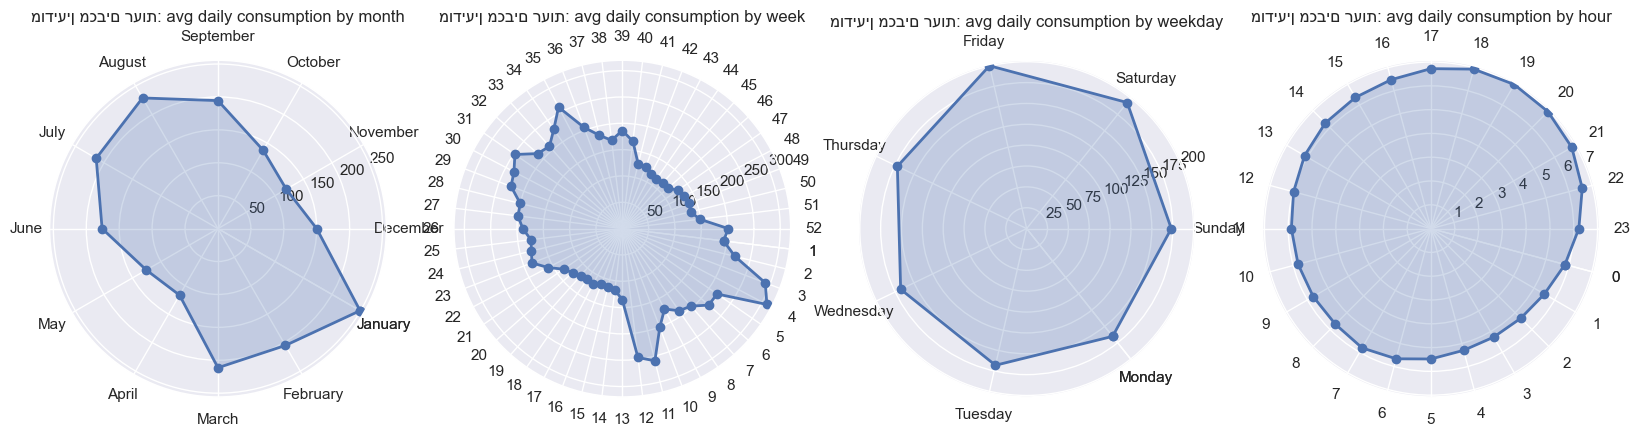

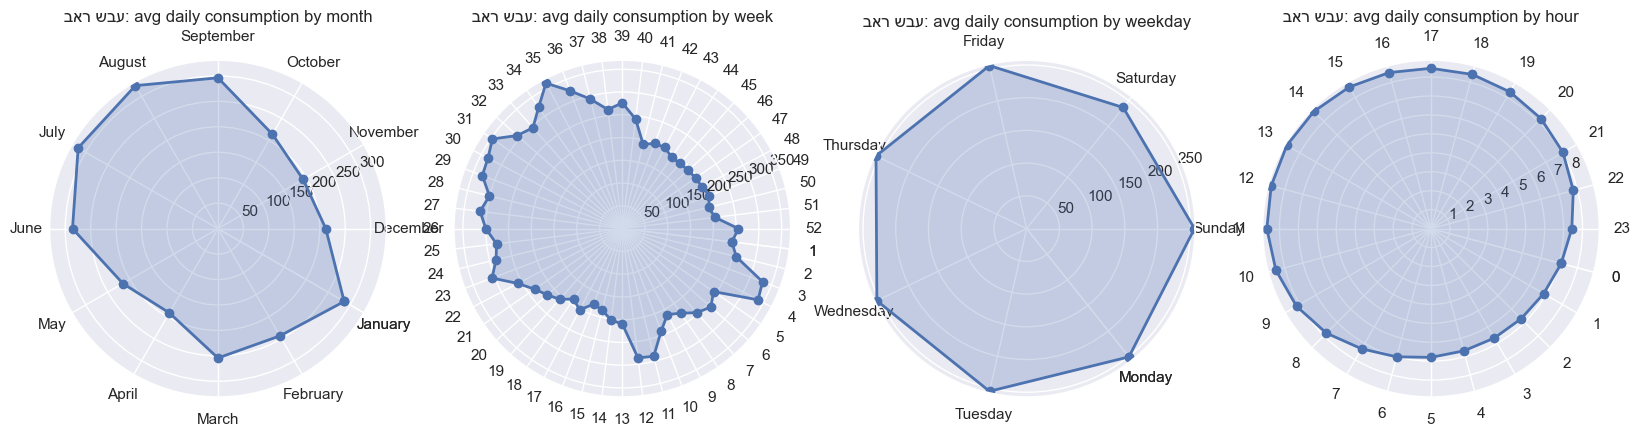

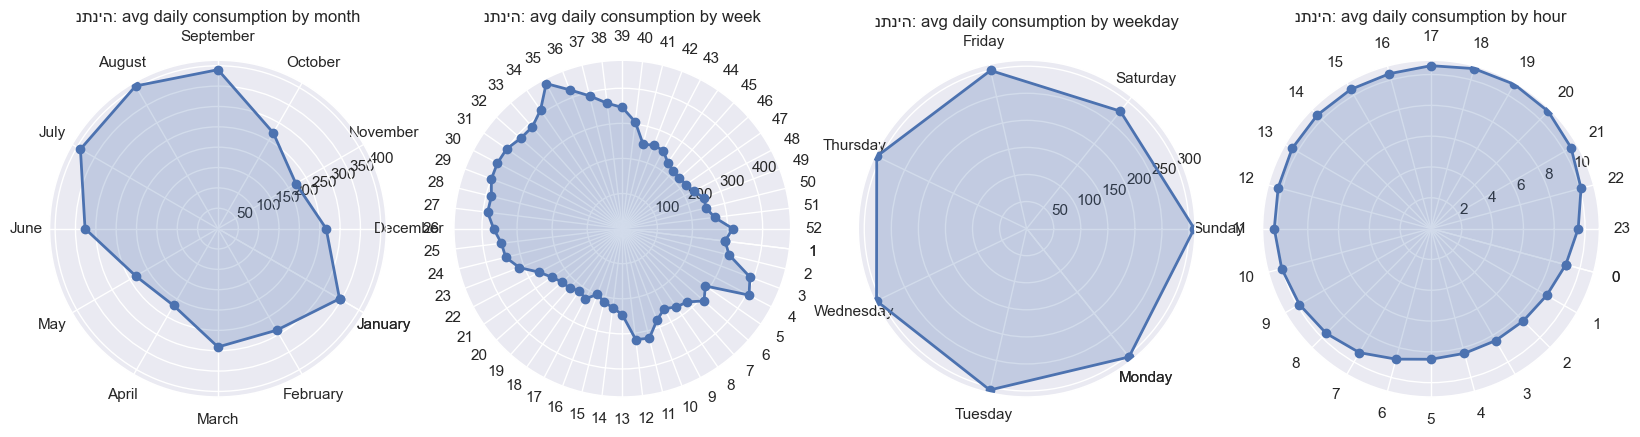

In [44]:
for city in CITIES:
    fig, axs = plt.subplots(figsize=(20, 5), nrows=1, ncols=4,
                                subplot_kw=dict(projection='polar'))
    stats=day_df[day_df.city == city].groupby('month').mean(numeric_only=True).total.values
    radar_plt(stats, axs[0], f'{city}: avg daily consumption by month', MONTHS)
    stats=day_df[day_df.city == city].groupby('week').mean(numeric_only=True).total.values
    radar_plt(stats, axs[1], f'{city}: avg daily consumption by week')
    stats=day_df[day_df.city == city].groupby('weekday').mean(numeric_only=True).total.values
    radar_plt(stats, axs[2], f'{city}: avg daily consumption by weekday', DAYS)
    stats=hour_df[hour_df.city == city].groupby('hour').mean(numeric_only=True).consumption.values
    radar_plt(stats, axs[3], f'{city}: avg daily consumption by hour', np.arange(0,24))

[Text(0.5, 1.0, 'consumption')]

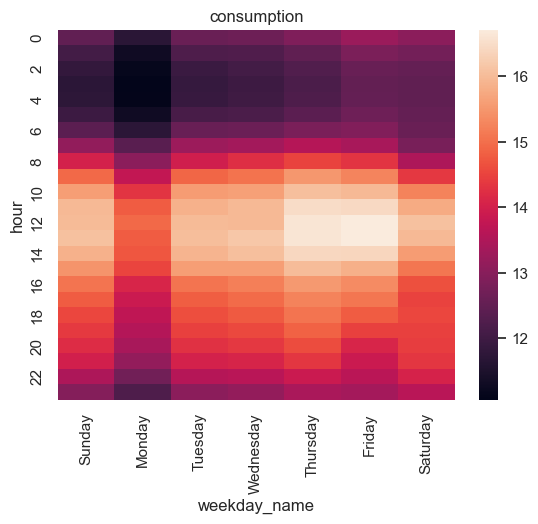

In [15]:
table = hour_df.groupby(['weekday_name', 'hour']).mean(numeric_only=True)['consumption'].reset_index().pivot(columns='weekday_name', index='hour', values='consumption')
sns.heatmap(table).set(title='consumption')

[Text(0.5, 1.0, 'MODIIN consumption')]

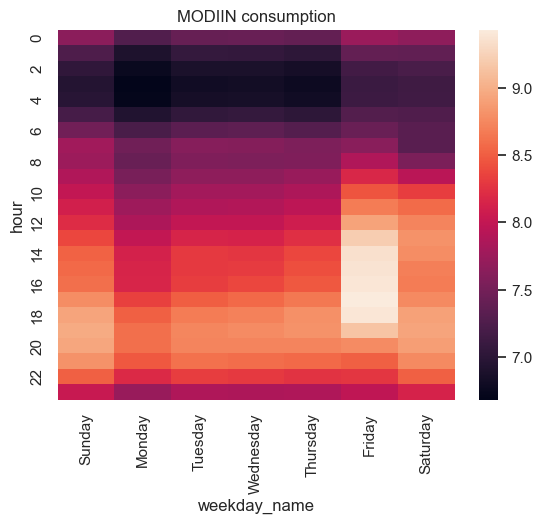

In [18]:
table = hour_df[hour_df.city == MODIIN].groupby(['weekday_name', 'hour']).mean(numeric_only=True)['consumption'].reset_index().pivot(columns='weekday_name', index='hour', values='consumption')
sns.heatmap(table).set(title='MODIIN consumption')

[Text(0.5, 1.0, 'consumption')]

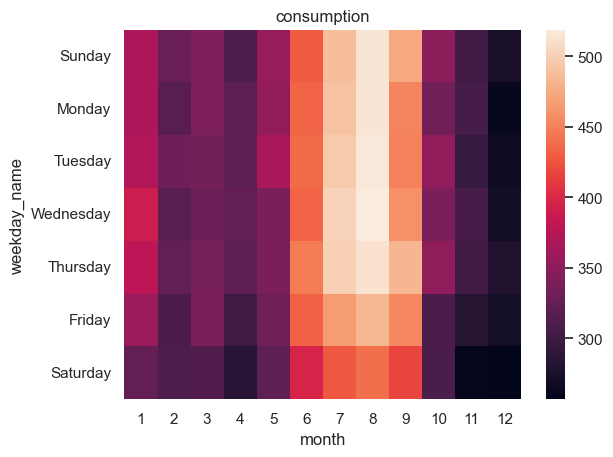

In [19]:
table = day_df.groupby(['weekday_name', 'month']).mean(numeric_only=True)['total'].reset_index().pivot(columns='month', index='weekday_name', values='total')
sns.heatmap(table).set(title='consumption')

<Axes: xlabel='weekday_name', ylabel='total'>

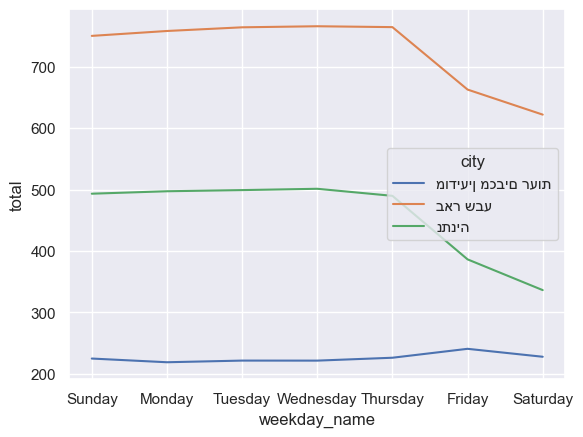

In [8]:
sns.lineplot(data=day_df, x='weekday_name', y='total', hue='city', errorbar=None)

<Axes: xlabel='rounded_heat_index', ylabel='total'>

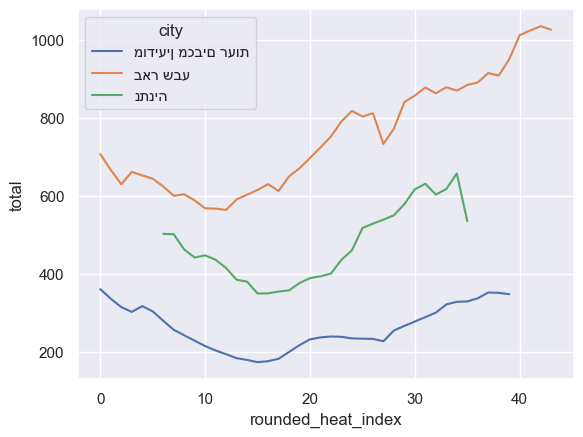

In [10]:
day_df['rounded_heat_index'] = day_df.heat_index.round(0)
sns.lineplot(data=day_df, x='rounded_heat_index', y='total', hue='city', errorbar=None)

C:\Users\Chapanin\AppData\Local\Temp\ipykernel_4368\1272273005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr_df = day_df.groupby(['id', 'city']).mean()


<Axes: xlabel='count_reg', ylabel='total'>

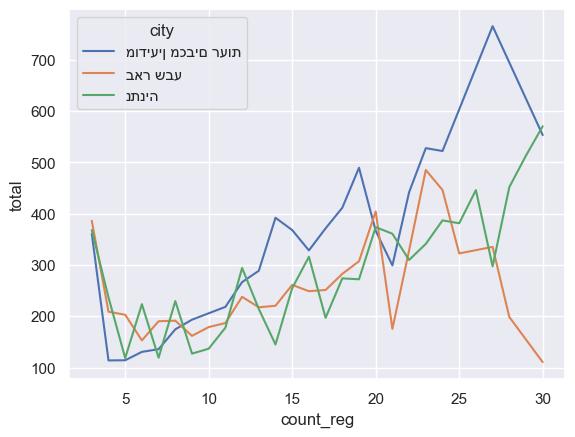

In [15]:
gr_df = day_df.groupby(['id', 'city']).mean()
sns.lineplot(data=gr_df, x='count_reg', y='total', hue='city', errorbar=None)

<Axes: xlabel='count_reg', ylabel='total'>

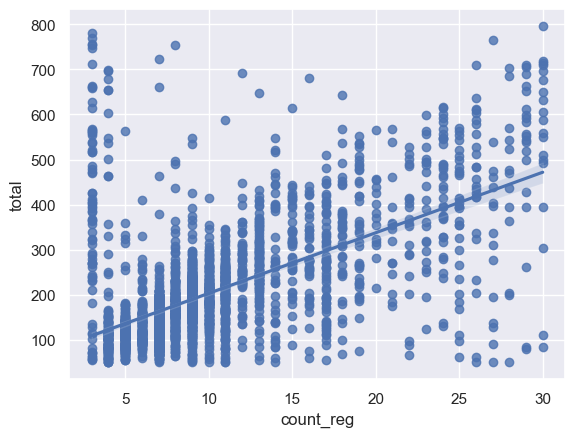

In [16]:
sns.regplot(data=gr_df, x='count_reg', y='total')

In [ ]:
sns.regplot(data=gr_df[(gr_df.count_reg < 50) & (gr_df.total < 2500)], x='count_reg', y='total')

In [ ]:
sns.displot(id_df[id_df.count_reg < 30].count_reg, kde=True)

# heatmap

In [7]:
from collections import defaultdict
h_df = pd.DataFrame(hour_df[(hour_df.city == MODIIN) & (hour_df.ts.dt.month >= 4) & (hour_df.ts.dt.month <= 9)][['id', 'ts','hour', 'consumption', 'temperature']])
day_mapping = {i: 'regular' for i in range(7)}
day_mapping[4] = 'friday'
day_mapping[5] = 'saturday'
h_df['day_type'] = hour_df.weekday.map(lambda x: day_mapping[x])
h_df.head(1)

id         ts  hour  consumption  temperature day_type
88  702552276 2022-04-01     0         3.54    20.316668   friday

In [8]:
w_df = pd.read_pickle('weather.pkl').reset_index(drop=True)
w_df = w_df[w_df.ts.dt.year == 2022]
w_df = w_df.groupby(w_df.ts.dt.day_of_year).mean()
w_df.head(1)

C:\Users\Chapanin\AppData\Local\Temp\ipykernel_12336\5952331.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  w_df = w_df.groupby(w_df.ts.dt.day_of_year).mean()


temperature  r_humidity  heat_index
ts                                     
1     12.854167   79.930556   12.854167

In [9]:
mean_consumption_by_day_and_hour = h_df[['id', 'day_type', 'hour', 'consumption']].groupby(['id', 'day_type', 'hour']).mean().to_dict()['consumption']
next(iter(mean_consumption_by_day_and_hour.items()))

((702552276, 'friday', 0), 6.827592849731445)

In [10]:
mean_consumption_by_id = h_df[['id', 'consumption']].groupby(['id']).mean().to_dict()['consumption']
next(iter(mean_consumption_by_id.items()))

(702552276, 6.371588230133057)

In [11]:
%%time
perc_difference_day_hour = [(x[3] - mean_consumption_by_day_and_hour[x[0], x[5], x[2]])/mean_consumption_by_day_and_hour[x[0], x[5], x[2]] for x in h_df.values]

CPU times: total: 11.7 s
Wall time: 11.7 s


In [12]:
%%time
perc_difference_id = [(x[3] - mean_consumption_by_id[x[0]])/mean_consumption_by_id[x[0]] for x in h_df.values]

CPU times: total: 10.1 s
Wall time: 10.2 s


In [13]:
h_df['consumption_diff_day_hour'] = perc_difference_day_hour
h_df['consumption_diff_day_hour'] = (h_df['consumption_diff_day_hour']*100).astype('int')
h_df['consumption_diff_id'] = perc_difference_id
h_df['consumption_diff_id'] = (h_df['consumption_diff_id']*100).astype('int')
h_df['r_temperature'] = np.round(h_df.temperature).astype('int')
h_df.head(5)

id         ts  hour  consumption  temperature  day_type  \
88  702552276 2022-04-01     0        3.540    20.316668    friday   
89  702552276 2022-04-02     0        2.905    23.850000  saturday   
90  702552276 2022-04-03     0        2.805    22.266666   regular   
91  702552276 2022-04-04     0        2.976    15.933333   regular   
92  702552276 2022-04-05     0        2.614    20.633333   regular   

    consumption_diff_day_hour  consumption_diff_id  r_temperature  
88                        -48                  -44             20  
89                        -58                  -54             24  
90                        -52                  -55             22  
91                        -49                  -53             16  
92                        -55                  -58             21

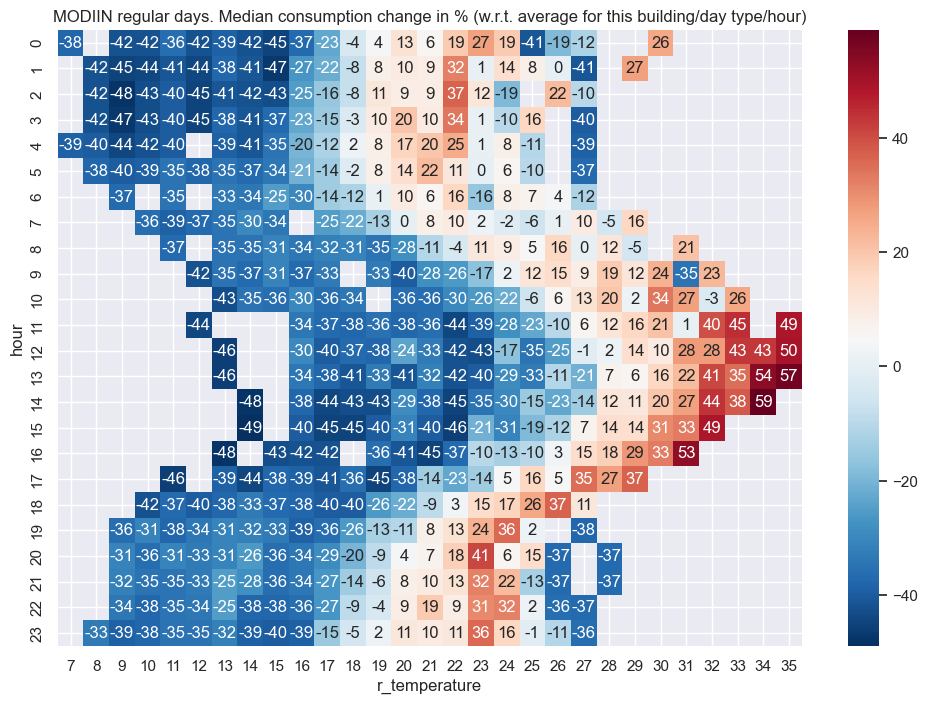

In [14]:
#gr = h_df[['day_type', 'hour', 'consumption', 'temperature', 'n_consumption']].groupby(['day_type', 'hour', 'consumption'
for day_type in ['regular', 'friday', 'saturday'][:1]:
    tmp = h_df[h_df.day_type == day_type][['hour', 'consumption_diff_day_hour', 'r_temperature']]
    table = tmp.groupby(['r_temperature', 'hour']).median(numeric_only=True).reset_index().pivot(columns='r_temperature', index='hour', values='consumption_diff_day_hour')
    plt.figure(figsize=(12,8))
    sns.heatmap(table, annot=np.round(table.values), cmap='RdBu_r').set(title=f'MODIIN {day_type} days. Median consumption change in % (w.r.t. average for this building/day type/hour)')

In [15]:
gr = h_df.groupby(['ts', 'day_type', 'hour']).mean().reset_index()
d = w_df.to_dict()['temperature']
temps = np.array([d[i] for i in range(1,366)])
gr['mean_temp'] = gr.ts.map(lambda x: temps[x.day_of_year - 1])
for ws in [3,5,7,10]:
    mean_temps = [temps[0]] + [temps[max(0, i-ws):i].mean() for i in range(1, len(temps))]
    gr[f'{ws}ma_temp'] = gr.ts.map(lambda x: mean_temps[x.day_of_year - 1])

gr.head(1)

ts day_type  hour            id  consumption  temperature  \
0 2022-04-01   friday     0  7.025945e+08     4.533434    20.316668   

   consumption_diff_day_hour  consumption_diff_id  r_temperature  mean_temp  \
0                 -23.852929           -25.991022           20.0   21.65463   

    3ma_temp   5ma_temp   7ma_temp  10ma_temp  
0  16.931481  15.221806  13.957639  12.515278

<Axes: xlabel='ts', ylabel='temperature'>

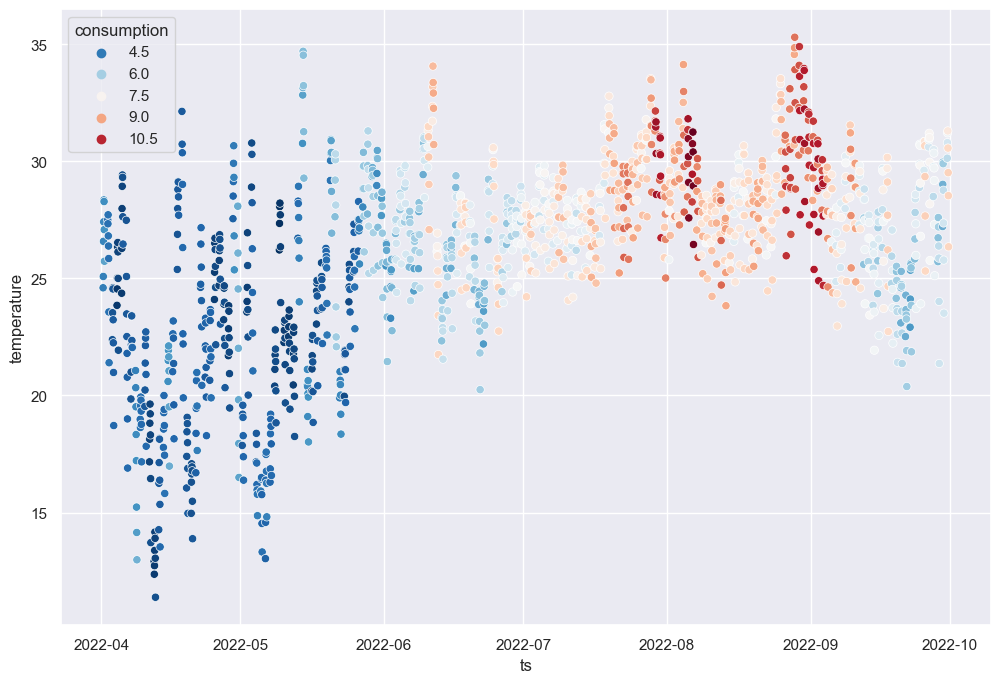

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gr[(gr.hour >= 10) & (gr.hour < 18)], x='ts', y='temperature', hue='consumption', palette='RdBu_r')

In [19]:
plt.figure(figsize=(12, 8))
sns.regplot(data=gr[(gr.hour >= 10) & (gr.hour < 18)], x='5ma_temp', y='temperature', scatter_kws ={'hue': 'consumption'}, palette='RdBu_r')

TypeError: regplot() got an unexpected keyword argument 'palette'

<Figure size 1200x800 with 0 Axes>

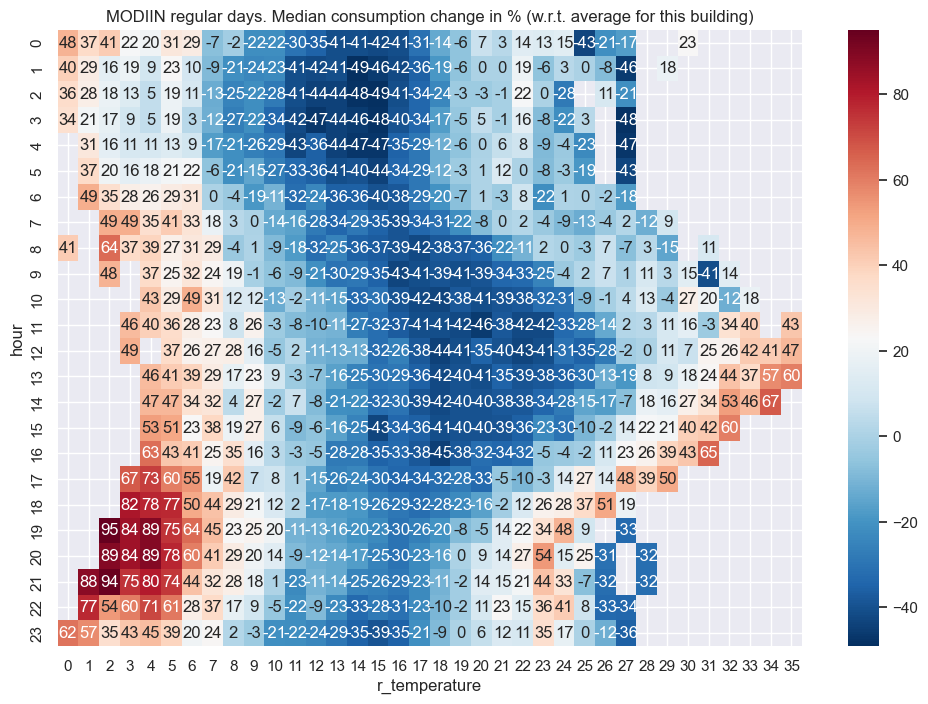

In [24]:
#gr = h_df[['day_type', 'hour', 'consumption', 'temperature', 'n_consumption']].groupby(['day_type', 'hour', 'consumption'

gr = h_df.groupby(['ts', 'hour', 'day_type']).mean().reset_index()
for day_type in ['regular', 'friday', 'saturday'][:1]:
    tmp = h_df[h_df.day_type == day_type][['hour', 'consumption_diff_id', 'r_temperature']]
    table = tmp.groupby(['r_temperature', 'hour']).median(numeric_only=True).reset_index().pivot(columns='r_temperature', index='hour', values='consumption_diff_id')
    plt.figure(figsize=(12,8))
    sns.heatmap(table, annot=np.round(table.values), cmap='RdBu_r').set(title=f'MODIIN {day_type} days. Median consumption change in % (w.r.t. average for this building)')

In [53]:
gr = h_df.groupby(['ts', 'day_type', 'hour']).mean().reset_index()
gr.head(1)

ts day_type  hour            id  consumption  temperature  \
0 2022-04-01   friday     0  7.025945e+08     4.533434    20.316668   

   n_consumption  r_temperature  
0     -23.852929           20.0

In [54]:
mean_consumption = gr[['day_type', 'hour', 'consumption']].groupby(['day_type', 'hour']).mean().to_dict()['consumption']
next(iter(mean_consumption.items()))

(('friday', 0), 6.119670391082764)

In [55]:
%%time
r = [(x[4] - mean_consumption[x[1], x[2]])/mean_consumption[x[1], x[2]] for x in gr.values]

CPU times: total: 0 ns
Wall time: 5 ms


In [56]:
gr['n_consumption'] = r
gr['n_consumption'] = (gr['n_consumption']*100).astype('int')
gr['r_temperature'] = np.round(gr.temperature/2).astype('int')*2
gr.head(5)

ts day_type  hour            id  consumption  temperature  \
0 2022-04-01 00:00:00   friday     0  7.025945e+08     4.533434    20.316668   
1 2022-04-01 01:00:00   friday     1  7.025945e+08     4.185172    20.150000   
2 2022-04-01 02:00:00   friday     2  7.025945e+08     3.996740    20.283333   
3 2022-04-01 03:00:00   friday     3  7.025945e+08     3.930039    20.150000   
4 2022-04-01 04:00:00   friday     4  7.025945e+08     3.987357    19.916666   

   n_consumption  r_temperature  
0            -25             20  
1            -28             20  
2            -29             20  
3            -29             20  
4            -28             20

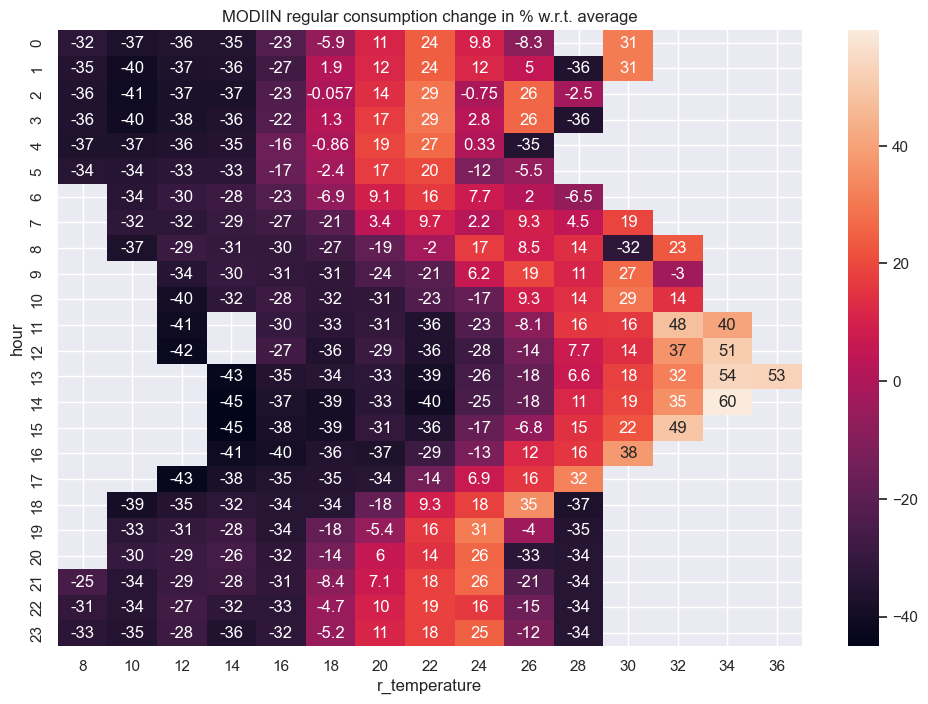

In [58]:
#gr = h_df[['day_type', 'hour', 'consumption', 'temperature', 'n_consumption']].groupby(['day_type', 'hour', 'consumption'
for day_type in ['regular', 'friday', 'saturday'][:1]:
    tmp = gr[gr.day_type == day_type][['hour', 'n_consumption', 'r_temperature']]
    table = tmp.groupby(['r_temperature', 'hour']).mean(numeric_only=True).reset_index().pivot(columns='r_temperature', index='hour', values='n_consumption')
    plt.figure(figsize=(12,8))
    sns.heatmap(table, annot=True).set(title=f'MODIIN {day_type} consumption change in % w.r.t. average')

# Outliers?

In [30]:
w_df = pd.read_pickle('weather.pkl').reset_index(drop=True)
w_df = w_df[w_df.ts.dt.year == 2022]
w_df.tail(1)

date  temperature  r_humidity  heat_index  \
157519 2022-12-31 23:50:00         11.2          72        11.2   

                      city                  ts  
157519  מודיעין מכבים רעות 2022-12-31 23:50:00

In [15]:
HOURS = [10,18]
tmp_df = w_df[(w_df.ts.dt.hour >= HOURS[0]) &(w_df.ts.dt.hour <= HOURS[1])].groupby([w_df.ts.dt.floor('D'), w_df.city]).mean(numeric_only=True).reset_index()
dfs = []
for city in CITIES:
    current = pd.DataFrame(tmp_df[tmp_df.city == city])
    temps = current['heat_index'].values
    for ws in [3,5,7, 10]:
        mean_temps = [temps[0]] + [temps[max(0, i-ws):i].mean() for i in range(1, len(temps))]
        current[f'past_{ws}'] = mean_temps

        mean_temps = [temps[max(0, i-ws):i+ws+1].mean() for i in range(len(temps))]
        current[f'around_{ws}'] = mean_temps
    dfs.append(current)
tmp_df = pd.concat(dfs)
tmp_df.head(5)

ts                city  temperature  r_humidity  heat_index  \
1  2022-01-01  מודיעין מכבים רעות     9.805556   86.203704    9.805556   
4  2022-01-02  מודיעין מכבים רעות    11.788889   79.407407   11.788889   
7  2022-01-03  מודיעין מכבים רעות    10.903704   83.537037   10.903704   
10 2022-01-04  מודיעין מכבים רעות    10.401852   92.907407   10.401852   
13 2022-01-05  מודיעין מכבים רעות    11.085185   85.870370   11.085185   

       past_3   around_3     past_5   around_5     past_7   around_7  \
1    9.805556  10.725000   9.805556  11.502778   9.805556  12.752778   
4    9.805556  10.797037   9.805556  12.082804   9.805556  12.787449   
7   10.797222  11.502778  10.797222  12.752778  10.797222  12.585741   
10  10.832716  12.082804  10.832716  12.787449  10.832716  12.626599   
13  11.031481  13.173810  10.725000  12.585741  10.725000  12.734877   

      past_10  around_10  
1    9.805556  12.626599  
4    9.805556  12.734877  
7   10.797222  12.655556  
10  10.832716  12.262566  
13  10.725000  11.820123

<Axes: xlabel='ts', ylabel='difference_past_10'>

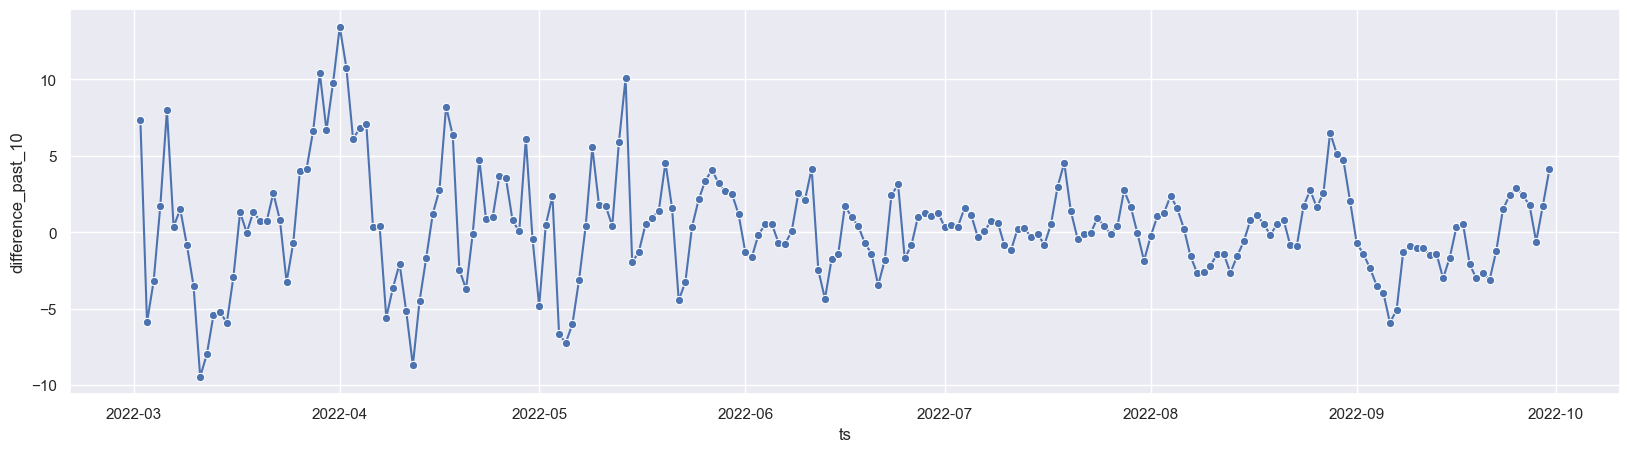

In [62]:
plt.figure(figsize=(20,5))
tmp_df['difference_past_10'] = tmp_df.heat_index - tmp_df.past_10
sns.lineplot(data=tmp_df[(tmp_df.city == MODIIN) & (tmp_df.ts > pd.Timestamp('2022-03-01')) & (tmp_df.ts < pd.Timestamp('2022-10-01'))], x='ts', y='difference_past_10', marker='o')

In [16]:
THRESHOLD = 4
tmp_df['doy'] = tmp_df.ts.dt.day_of_year
tmp_df['outlier'] = (tmp_df.heat_index - tmp_df.around_10) > THRESHOLD
tmp_df[tmp_df.outlier & (tmp_df.heat_index > 25) & (tmp_df.city == MODIIN)]

ts                city  temperature  r_humidity  heat_index  \
271 2022-04-01  מודיעין מכבים רעות    26.431481   24.481481   25.914659   
283 2022-04-05  מודיעין מכבים רעות    27.261111   20.277778   26.370609   
319 2022-04-17  מודיעין מכבים רעות    27.833333   11.703704   26.388532   
355 2022-04-29  מודיעין מכבים רעות    27.955556   34.685185   27.224028   
400 2022-05-14  מודיעין מכבים רעות    31.929630   21.388889   30.136452   
484 2022-06-11  מודיעין מכבים רעות    32.085185   24.518519   30.491605   
718 2022-08-28  מודיעין מכבים רעות    31.940741   56.203704   35.257942   
721 2022-08-29  מודיעין מכבים רעות    31.246296   59.814815   34.611076   
724 2022-08-30  מודיעין מכבים רעות    31.244444   59.555556   34.904614   
817 2022-09-30  מודיעין מכבים רעות    29.272222   48.314815   30.001426   

        past_3   around_3     past_5   around_5     past_7   around_7  \
271  19.082099  22.040390  16.905556  20.826269  14.692857  19.086301   
283  23.707257  22.504265  23.587286  22.095798  22.040390  20.604820   
319  19.590123  20.371288  17.397778  19.382399  17.751058  19.532031   
355  23.027527  22.735349  23.056026  22.426363  22.845570  21.479208   
400  22.704724  23.028131  23.074400  23.360580  21.919545  23.202659   
484  27.734530  26.531234  26.963585  26.394626  26.986009  26.593874   
718  30.619071  32.790699  29.644568  31.521026  29.111964  30.697326   
721  32.108963  32.762612  31.321402  31.773031  30.066977  30.647895   
724  33.651817  32.799268  32.345246  31.684851  31.155980  30.559061   
817  26.464597  27.274420  27.060188  27.102770  26.986242  26.499934   

       past_10  around_10  doy  outlier  
271  12.467778  17.327517   91     True  
283  19.317162  19.112702   95     True  
319  18.162778  20.121404  107     True  
355  21.110417  20.810477  119     True  
400  20.064793  21.883469  134     True  
484  26.331413  26.047454  162     True  
718  28.749083  29.694257  240     True  
721  29.466304  29.728552  241     True  
724  30.182835  29.785237  242     True  
817  25.868332  25.317854  273     True

In [20]:
doys = [[85,100],[103, 112], [115, 124], [130,138],[157,167],[235,247],[268,278]]

In [11]:
city_day_df = day_df[['city', 'ts', 'total', 'day_of_year']].groupby(['city', 'ts']).mean(numeric_only=False).reset_index() 
city_day_df['friday'] = city_day_df.ts.dt.weekday == 4
city_day_df.head(1)

city         ts       total  day_of_year  friday
0  באר שבע 2022-01-01  429.153839          1.0   False

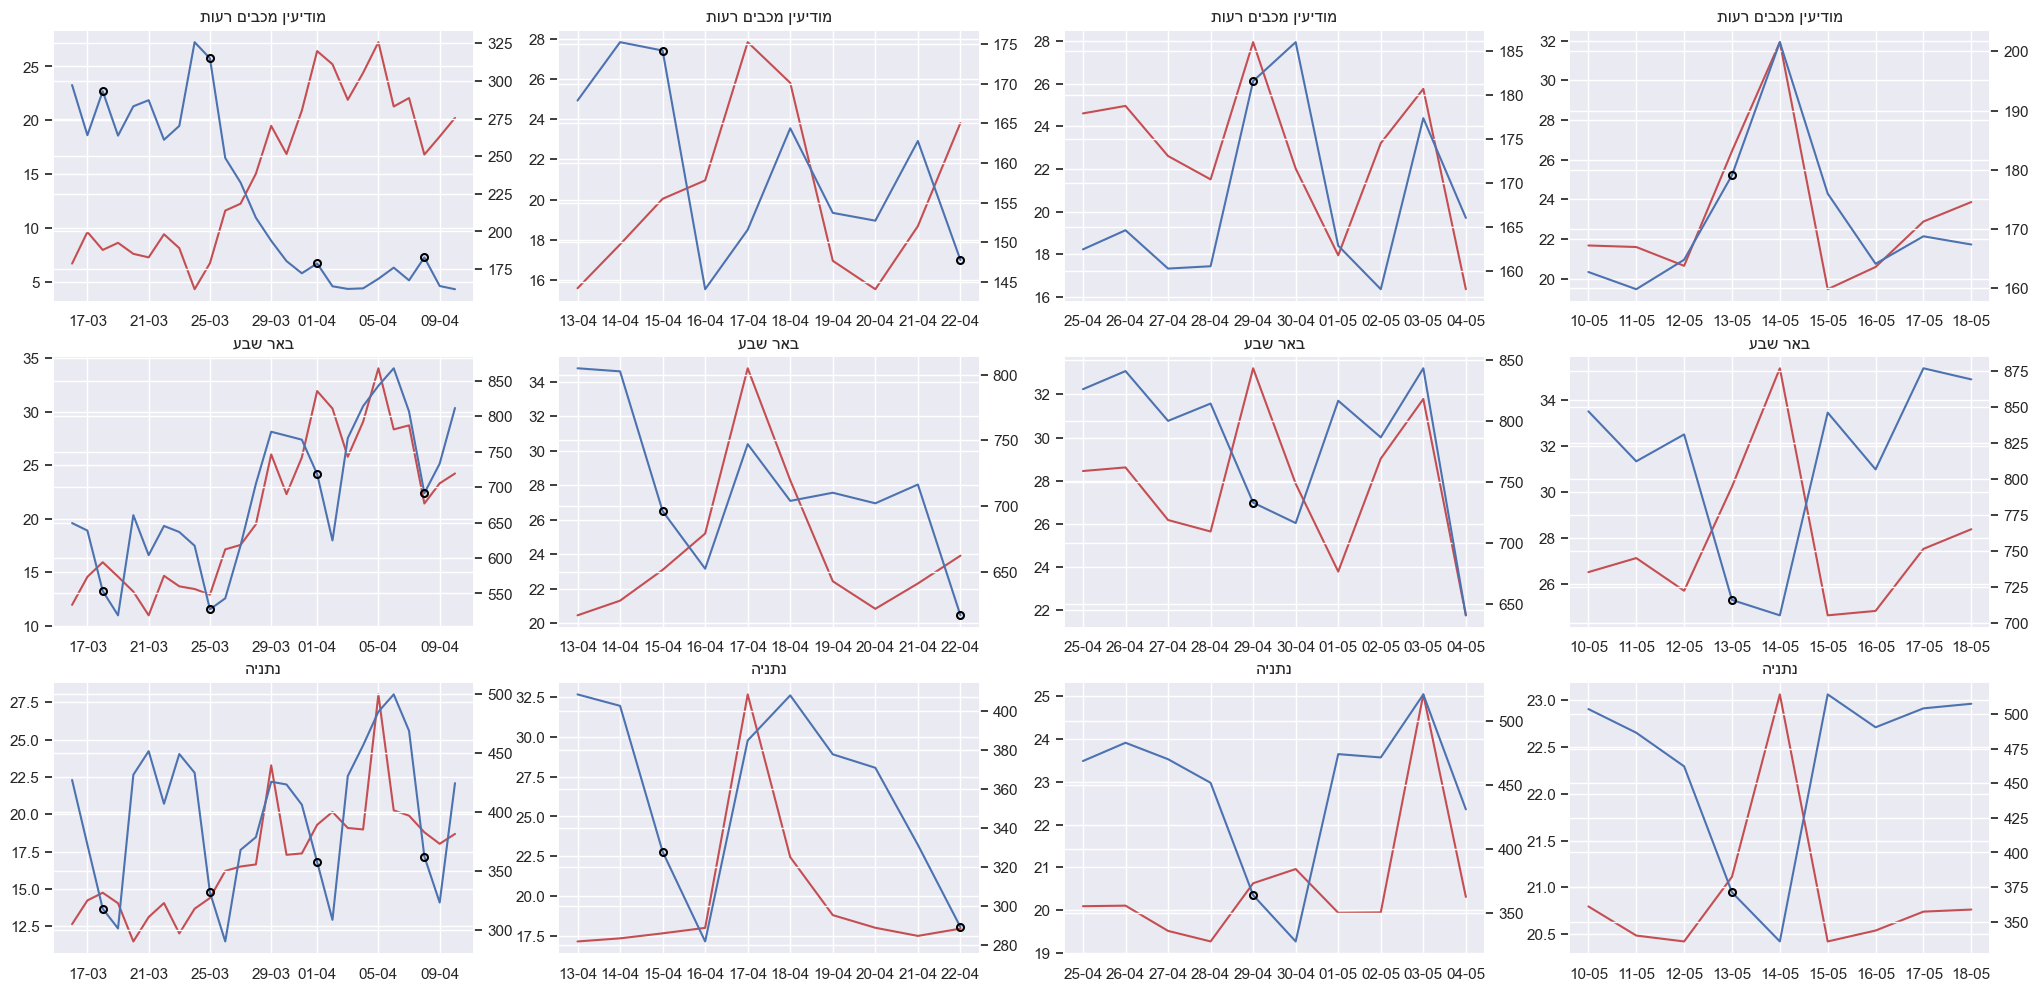

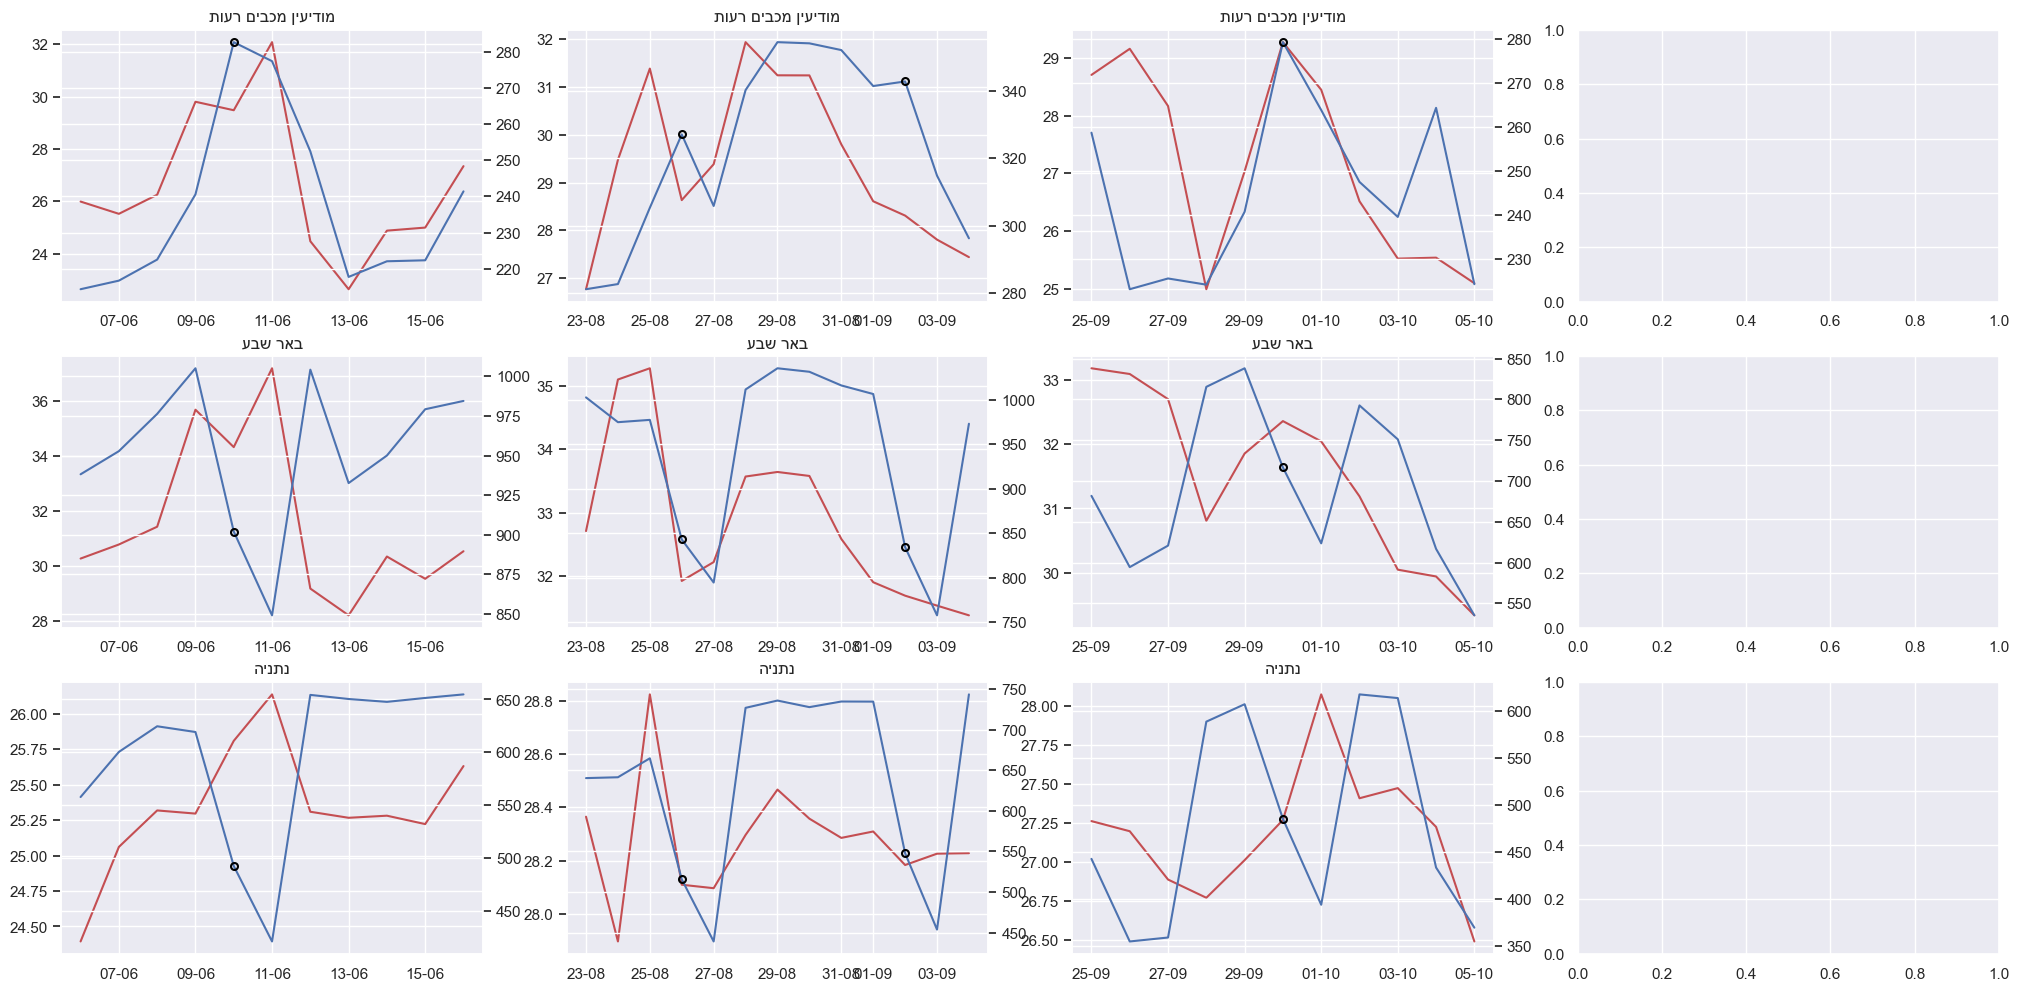

In [48]:
from matplotlib import pyplot as plt, dates as mdates
_, axis = plt.subplots(figsize=(25, 12), nrows=3, ncols=4)
for i, doy in enumerate(doys[:4]):
    for j, city in enumerate(CITIES):
        ax = sns.lineplot(x='ts', y='temperature', data=tmp_df[(tmp_df.doy >= doy[0])&(tmp_df.doy <= doy[1]) & (tmp_df.city == city)], color="r", ax=axis[j][i])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
        ax.set_title(city[::-1])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax2 = ax.twinx()
        tmp = city_day_df[(city_day_df.day_of_year >= doy[0])&(city_day_df.day_of_year <= doy[1]) & (city_day_df.city == city)]
        places = list(np.where(tmp.friday)[0])
        ax = sns.lineplot(x='ts', y='total', data=tmp, color="b",
                    marker = 'o', markersize=5, fillstyle='none', markeredgewidth=1.5, markeredgecolor='black', markevery=places, ax=ax2)
        
        ax.set_ylabel('')
        
_, axis = plt.subplots(figsize=(25, 12), nrows=3, ncols=4)
for i, doy in enumerate(doys[4:]):
    for j, city in enumerate(CITIES):
        ax = sns.lineplot(x='ts', y='temperature', data=tmp_df[(tmp_df.doy >= doy[0])&(tmp_df.doy <= doy[1]) & (tmp_df.city == city)], color="r", ax=axis[j][i])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
        ax.set_title(city[::-1])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax2 = ax.twinx()
        tmp = city_day_df[(city_day_df.day_of_year >= doy[0])&(city_day_df.day_of_year <= doy[1]) & (city_day_df.city == city)]
        places = list(np.where(tmp.friday)[0])
        ax = sns.lineplot(x='ts', y='total', data=tmp, color="b",
                    marker = 'o', markersize=5, fillstyle='none', markeredgewidth=1.5, markeredgecolor='black', markevery=places, ax=ax2)
        ax.set_ylabel('')
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%D'))

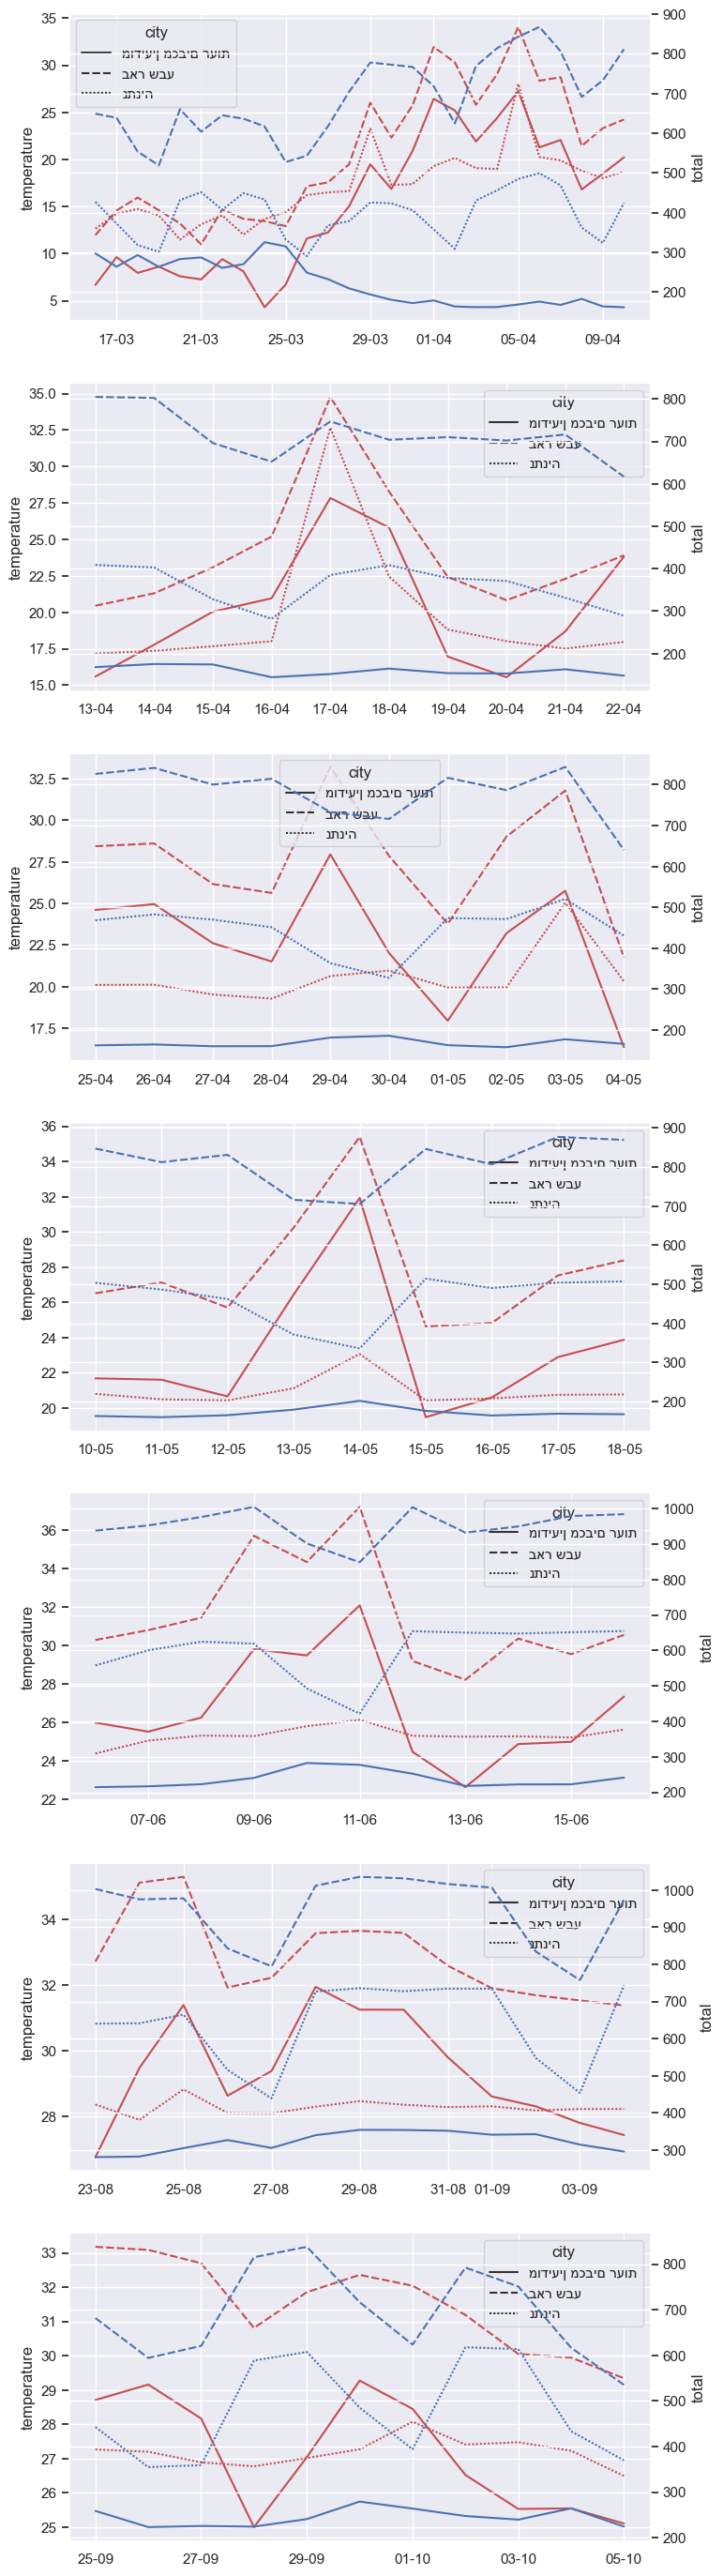

In [40]:
from matplotlib import pyplot as plt, dates as mdates
_, axis = plt.subplots(figsize=(8, 35), nrows=7, ncols=1, sharey='row')
for i, doy in enumerate(doys):
    ax = sns.lineplot(x='ts', y='temperature', data=tmp_df[(tmp_df.doy >= doy[0])&(tmp_df.doy <= doy[1])], style='city', color="r", ax=axis[i], style_order=CITIES)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    ax.set_xlabel('')
    ax2 = ax.twinx()
    tmp = city_day_df[(city_day_df.day_of_year >= doy[0])&(city_day_df.day_of_year <= doy[1])]
    places = list(np.where(tmp.friday & (tmp.city == MODIIN))[0])
    sns.lineplot(x='ts', y='total', data=tmp, color="b", style='city', ax=ax2, style_order=CITIES, legend=None)

#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%D'))